# Word embeddings

<br>

Word embeddings represent categorical data like words as vectors in a high dimensional space. 
These are constructed by machine learning methods that use co-occurrence statistics, expressed in terms of simple language models. Embeddings reveal surprising semantic relations encoded in linear relationships. They require very large corpora of text or other co-occurrence data to construct good embeddings. 

Embeddings are trained "end-to-end" as part of LLMs. However, working with embeddings separately can give intuition of how they can be used in the Transformer attention mechanism. The Transformer takes embeddings as input in the first layer, and then uses the embeddings to predict tokens as the output. In between, the embeddings are transformed into internal encodings by a combination of attention and mapping with an MLP.

In this notebook we illustrate some of the basics of word embeddings, using embeddings constructed on large amounts of text extracted from [Wikipedia](https://en.wikipedia.org/wiki/Main_Page). There are several tutorials on the web for this material; one is [here](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519).


In [37]:
import numpy as np
import gensim
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The following bit of code reads in 100-dimensional embedding vectors, trained on a collection of Wikipedia data. Specifically, it uses 6 billion tokens of Wikipedia, with a 400,000 word vocabulary. You can find other precompiled embeddings [here](https://github.com/RaRe-Technologies/gensim-data).


In [38]:
import gensim
import gensim.downloader as gdl
embedding = gdl.load("glove-wiki-gigaword-100")

Let's explore these embeddings a bit. Here is the vector for 'copyright'. 

In [39]:
embedding['copyright']

array([ 0.28292 , -1.0518  ,  0.17169 , -0.19509 ,  1.1078  ,  0.35123 ,
       -1.1153  , -0.7574  ,  0.43468 , -0.23271 ,  0.56626 , -0.32403 ,
        0.20586 , -0.7068  , -0.37967 ,  0.2811  ,  0.66518 ,  0.066218,
       -0.49656 , -0.44746 , -0.76732 , -0.69151 ,  1.0989  ,  0.68884 ,
        1.0099  , -0.099243,  0.86778 , -0.74706 , -0.53393 , -0.98153 ,
        0.33981 ,  0.87678 ,  0.55539 ,  0.25211 , -0.093136, -0.12268 ,
       -0.18995 , -0.5596  ,  0.022301, -0.65089 ,  0.15131 ,  0.69039 ,
       -0.25731 , -0.10418 ,  0.3187  , -0.92036 , -0.080776, -0.72957 ,
       -0.062274, -0.30242 ,  1.108   ,  0.45579 , -0.24216 , -0.17086 ,
        0.47928 , -0.38471 ,  0.55145 , -0.56831 ,  2.1103  , -0.40532 ,
       -0.35658 ,  0.30065 , -1.1101  , -0.40778 ,  0.65017 , -0.10852 ,
        0.97684 ,  0.30761 ,  0.043331, -0.54005 , -0.36475 ,  0.72474 ,
        0.18027 ,  0.41623 , -0.32136 , -0.942   , -0.87021 ,  0.009036,
       -1.6118  ,  0.085464,  0.46778 , -0.99888 , 

But now let's see which vectors are closest to the 'copyright' vector. This is a little more interesting!

In [40]:
embedding.most_similar('copyright', topn=10)

[('infringement', 0.7312791347503662),
 ('copyrights', 0.6773107051849365),
 ('patent', 0.6438419818878174),
 ('patents', 0.6030457019805908),
 ('licensing', 0.602853536605835),
 ('piracy', 0.6020364165306091),
 ('copyrighted', 0.5973290205001831),
 ('rights', 0.5897216200828552),
 ('privacy', 0.5878084897994995),
 ('ipr', 0.5850082635879517)]

Let's see how the similarity is computed. The vectors are normalized and then the inner product is taken. This computes the cosine of the angle between the vectors in the high-dimensional embedding space.

In [41]:
word1 = 'copyright'
word2 = 'infringement'

u = embedding[word1]
v = embedding[word2]

u = u/np.sqrt(u@u)
v = v/np.sqrt(v@v)
u @ v



0.73127913

Now, let's look at some of the components of the embedding vectors. What do the distributions of values look like?
We'll first pull out the vocabulary. We see lots of garbage. This is one thing that tokenization helps with.

In [42]:
vocab = set([w for w in embedding.vocab])
[w for w in vocab][0:100]

['sumathi',
 'radics',
 'sources',
 '60.49',
 'bumiputra',
 'profilers',
 '9.3-mile',
 'wasserburg',
 'rottweilers',
 'rafei',
 'kızılcahamam',
 'nietlispach',
 'slaidburn',
 'dubbed',
 'garn',
 'simpkins',
 'kyustendil',
 'nightside',
 'sha',
 'lollobrigida',
 'bijlani',
 'staat',
 'malmborg',
 'low-caste',
 '15:41',
 'mittermaier',
 '.413',
 'borama',
 'tsiang',
 'brayton',
 'liupanshui',
 'rúhíyyih',
 'mahalaxmi',
 'r.m.s.',
 'hinting',
 'beheer',
 '50-mile',
 'richibucto',
 'namig',
 'bundesstraßen',
 'dirigo',
 '4,993',
 'luers',
 'taxonomy',
 'take-offs',
 'hat-tricks',
 'cfls',
 'controled',
 'loca',
 'sneakier',
 'r.j.',
 'radomir',
 'thomasi',
 'festin',
 'ruggiano',
 'ocak',
 'drakon',
 'sterilisation',
 'thuagsuban',
 'ksetra',
 'micronuclei',
 'berar',
 'paraparaumu',
 'two-strokes',
 'spoken-word',
 'avro',
 'balaena',
 'quotable',
 'yasith',
 'djorovic',
 '25.94',
 '(202)',
 'respite',
 'swirled',
 'holowesko',
 'c&c',
 'reynal',
 'vagina',
 'luceafărul',
 'baggers',
 'cu

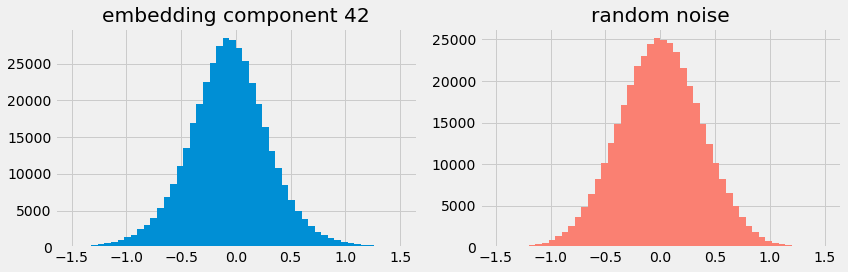

In [43]:
j = 42
x = [embedding[w][j] for w in vocab]

sigma = np.std(x)
z = [np.random.normal(scale=sigma) for w in vocab]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('embedding component %d' % j)
_ = plt.hist(x, bins=50, range=(-1.5,1.5))
plt.subplot(1,2,2)
_ = plt.hist(z, bins=50, range=(-1.5,1.5), color='salmon')
plt.title('random noise')
plt.tight_layout()
plt.show()



Now, let's generate a scatter plot of a few <i>pairs</i> of components. It all looks like random Gaussian noise!


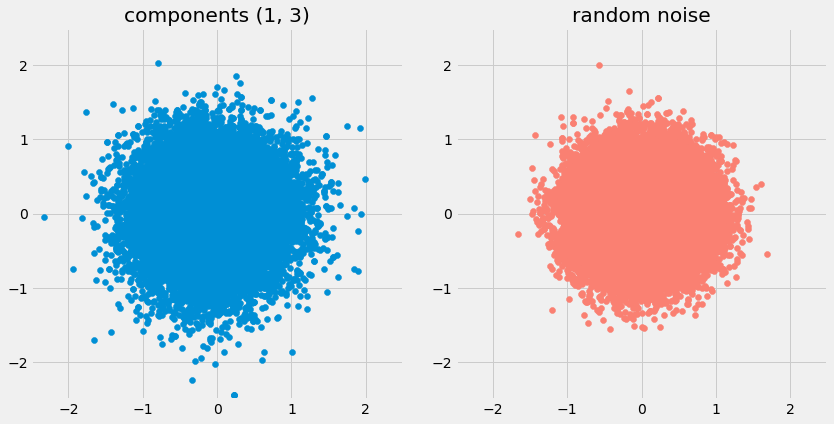

In [44]:
(i,j) = (1, 3)
x = np.array([[embedding[w][i], embedding[w][j]] for w in vocab])

(s1, s2) = (np.std(x[:,0]), np.std(x[:,1]))
z = np.array([[np.random.normal(scale=s1), np.random.normal(scale=s2)] for w in vocab])

sample = np.random.choice(range(len(vocab)), size=50000)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x[sample,0], x[sample,1])
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.gca().set_aspect('equal')
plt.title('components (%d, %d)' % (i,j))


plt.subplot(1,2,2)
plt.scatter(z[sample,0], z[sample,1], color='salmon')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.gca().set_aspect('equal')
plt.title('random noise')
plt.tight_layout()
plt.show()


### Exploring analogies

Now we'll explore how analogies are "solved" using the embeddings. Here is the canonical example:


In [45]:
embedding.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473)]

In [46]:
embedding.most_similar(positive=['paris', 'spain'], negative=['france'], topn=3)

[('madrid', 0.8061116933822632),
 ('aires', 0.7141225934028625),
 ('buenos', 0.6974526643753052)]

In [47]:
embedding.most_similar(positive=['paris', 'germany'], negative=['france'], topn=3)

[('berlin', 0.8846380710601807),
 ('frankfurt', 0.7985544204711914),
 ('vienna', 0.76759934425354)]

In [48]:
embedding.most_similar(positive=['easiest', 'hard'], negative=['easy'], topn=3)

[('hardest', 0.6622092723846436),
 ('toughest', 0.6526678204536438),
 ('smartest', 0.5931004285812378)]

So, we see that there is a great deal of semantic information encoded in the embeddings, even though they appear to be Gaussian noise. The relations are hidden in the embedding vectors. These semantic relations are teased out and exploited by the "Attention" mechanism of Transformer language models.

In [49]:
embedding.most_similar(positive=['einstein', 'soccer'], negative=['science'], topn=3)

[('maradona', 0.5813312530517578),
 ('pele', 0.5504352450370789),
 ('cruyff', 0.5434942245483398)]